In [1]:
import numpy as np
import keras
import pandas as pd 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM,Bidirectional
import re
import tensorflow as tf
from keras.preprocessing.text import Tokenizer

In [2]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Activation, Conv2D, Input, Embedding, Reshape, MaxPool1D, Concatenate, Flatten, Dropout, Dense, Conv1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam,SGD
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/5-classes-bangla-sentiment-analysis-dataset/Bert_Preprocessed_5_classes_Dataset.xlsx


In [4]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [5]:
df=pd.read_excel('/kaggle/input/5-classes-bangla-sentiment-analysis-dataset/Bert_Preprocessed_5_classes_Dataset.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13802 entries, 0 to 13801
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  13802 non-null  int64 
 1   Index       13802 non-null  int64 
 2   Text        13800 non-null  object
 3   Sentiment   13802 non-null  object
 4   Label       13802 non-null  int64 
 5   Token       13802 non-null  object
 6   Token_ID    13802 non-null  object
dtypes: int64(3), object(4)
memory usage: 754.9+ KB


In [6]:
df.head()

,Unnamed: 0,Index,Text,Sentiment,Label,Token,Token_ID
0,4068,4068,প্রথম আলোর উচিত হা হা রিএক্ট চালু করা,Positive,2,"['পর', '##থম', 'আলে', '##ার', 'উচিত', 'হা', 'হ...","[2076, 25492, 24182, 3187, 2351, 7725, 7725, 6..."
1,10991,10991,শ্রীলংকার সাথে সাকিব যেদিন আম্পায়ারদের ভুল সি...,Positive,2,"['শর', '##ীল', '##ংকার', 'সাথে', 'সাকিব', 'যেদ...","[14033, 36600, 62021, 2179, 4798, 9012, 5027, ..."
2,1072,1072,যেকোনো ব্যবসা প্রতিষ্ঠান সরকারের হাতে থাকলেই চ...,Very Negative,3,"['যে', '##কে', '##ানে', '##া', 'ব', '##যব', '#...","[2060, 2071, 31044, 2395, 5740, 69734, 6240, 5..."
3,1040,1040,তম হয়ে পাস করেছি মিস্টি বিতরণ করা হোক,Very Positive,4,"['তম', 'হয', '##ে', 'পাস', 'করেছি', 'মিস', '##...","[2380, 33668, 2094, 3094, 3267, 3139, 2294, 55..."
4,8099,8099,কারখানা খুব লাভ করেছে এই অজুহাতে আবার বেতন বাড়...,Neutral,1,"['কারখানা', 'খ', '##ব', 'লাভ', 'করেছে', 'এই', ...","[4234, 5356, 4282, 2325, 2124, 2045, 28867, 29..."


<AxesSubplot:xlabel='Label', ylabel='count'>

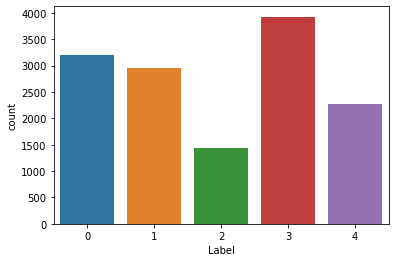

In [7]:
sns.countplot(df['Label'])

In [8]:
df.Label.value_counts(), len(df)

(3    3928
 0    3198
 1    2951
 4    2280
 2    1445
 Name: Label, dtype: int64,
 13802)

In [9]:
maxlen = 200
max_features = 10000
batch_size = 32

In [10]:
df['Token']=df['Token'].astype('str')

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['Token'],df['Label'] , test_size=0.1,random_state=2)
x_train, x_validation, y_train, y_validation = train_test_split(x_train,y_train,test_size=0.1,random_state=42)

In [12]:
vocab_size=32000

In [13]:
tokenizer  = Tokenizer(num_words = max_features,oov_token = "<OOV>")
tokenizer.fit_on_texts(df['Token'])

train_seq =  tokenizer.texts_to_sequences(x_train)
val_seq =  tokenizer.texts_to_sequences(x_validation)
test_seq = tokenizer.texts_to_sequences(x_test)

In [14]:
x_train = pad_sequences(train_seq, maxlen=maxlen, dtype='int32', padding='post',truncating='post') #maxlen = maxlen, padding='post')
x_validation = pad_sequences(val_seq, maxlen=maxlen, dtype='int32', padding='post',truncating='post') #maxlen = maxlen, padding='post')
x_test = pad_sequences(test_seq, maxlen=maxlen, dtype='int32', padding='post',truncating='post') #maxlen = maxlen, padding='post')

In [15]:
model= Sequential()
model.add(Embedding(vocab_size,40,input_length=maxlen,name='Embedding'))
model.add(Conv1D(200, kernel_size=3, activation = "relu"))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.25))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.1))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(12, activation='relu'))
model.add(Flatten())
model.add(Dense(units=5, activation='softmax'))
adam=Adam(learning_rate=0.003)
model.summary()
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

2023-01-31 11:10:21.452502: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-31 11:10:21.453418: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-31 11:10:21.545229: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-31 11:10:21.546031: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-31 11:10:21.546765: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding (Embedding)        (None, 200, 40)           1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 198, 200)          24200     
_________________________________________________________________
bidirectional (Bidirectional (None, 198, 256)          336896    
_________________________________________________________________
dropout (Dropout)            (None, 198, 256)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               164352    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                6

In [16]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=15,
    min_delta=0.001,
    restore_best_weights=True,
)

In [17]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=30, callbacks=[early_stopping],verbose=1, validation_data=(x_validation, y_validation))

Epoch 1/30


2023-01-31 11:10:25.798055: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2023-01-31 11:10:31.546103: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


350/350 [==============================] - 30s 46ms/step - loss: 1.5734 - accuracy: 0.2636 - val_loss: 1.5622 - val_accuracy: 0.2953
Epoch 2/30
350/350 [==============================] - 15s 42ms/step - loss: 1.5552 - accuracy: 0.2913 - val_loss: 1.5473 - val_accuracy: 0.2985
Epoch 3/30
350/350 [==============================] - 16s 46ms/step - loss: 1.5057 - accuracy: 0.3409 - val_loss: 1.5377 - val_accuracy: 0.3146
Epoch 4/30
350/350 [==============================] - 14s 40ms/step - loss: 1.4360 - accuracy: 0.3833 - val_loss: 1.5783 - val_accuracy: 0.3307
Epoch 5/30
350/350 [==============================] - 15s 43ms/step - loss: 1.3317 - accuracy: 0.4493 - val_loss: 1.5777 - val_accuracy: 0.3130
Epoch 6/30
350/350 [==============================] - 14s 40ms/step - loss: 1.2175 - accuracy: 0.5072 - val_loss: 1.6656 - val_accuracy: 0.3130
Epoch 7/30
350/350 [==============================] - 15s 42ms/step - loss: 1.1166 - accuracy: 0.5569 - val_loss: 1.8027 - val_accuracy: 0.3065
Epo

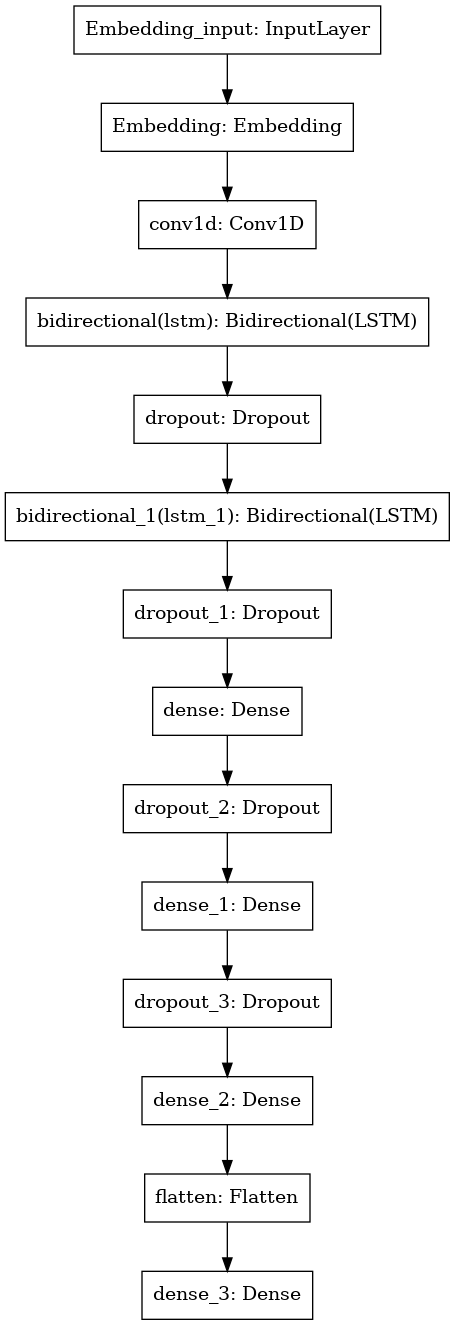

In [18]:
tf.keras.utils.plot_model(model, to_file='5 classes Conv-BiLSTM model.png', show_shapes=False,show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

In [19]:
model.evaluate(x_test, y_test)

44/44 [==============================] - 1s 19ms/step - loss: 1.5212 - accuracy: 0.3324


[1.5211541652679443, 0.33236783742904663]

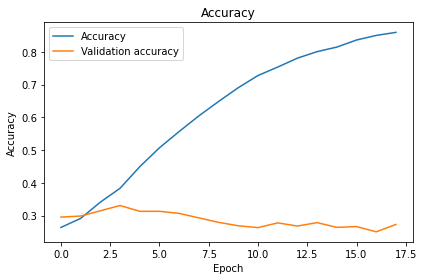

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label="Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig('5 classes SentNoB Conv-BiLSTM Val_acc.png',format='png',transparent='True')
plt.show()

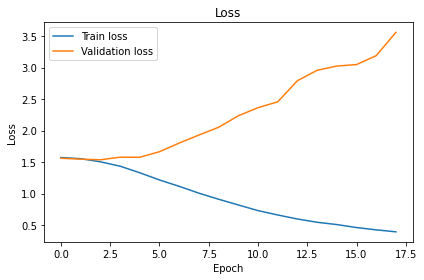

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label="Train loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig('5 classes SentNoB Conv-BiLSTM Val_loss.png',format='png',transparent='True')
plt.show()

In [22]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)

In [23]:
print(y_test.shape)
print(y_pred.shape)

(1381,)
(1381,)


In [24]:
y_pred = y_pred.reshape(-1,1)


In [25]:
categories = ['0','1','2','3','4']
print(classification_report(y_test, y_pred, target_names=categories))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       322
           1       0.26      0.30      0.28       293
           2       0.00      0.00      0.00       129
           3       0.33      0.78      0.47       405
           4       0.54      0.24      0.33       232

    accuracy                           0.33      1381
   macro avg       0.23      0.26      0.22      1381
weighted avg       0.24      0.33      0.25      1381



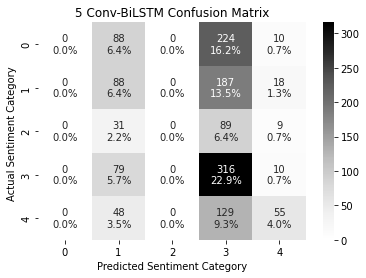

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.1%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(5,5)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greys')

ax.set_title('5 Conv-BiLSTM Confusion Matrix');
ax.set_xlabel('Predicted Sentiment Category')
ax.set_ylabel('Actual Sentiment Category ');

ax.xaxis.set_ticklabels([0,1,2,3,4])
ax.yaxis.set_ticklabels([0,1,2,3,4])
sns.set(color_codes=True)
sns.set(font_scale=.6)
plt.savefig('5 Conv-BiLSTM Confusion Matrix.png', bbox_inches = "tight")
plt.show()

In [27]:
from sklearn.metrics import classification_report

y_pred_raw = model.predict(x_test)
y_pred = np.argmax(y_pred_raw,axis=1)

Accuracy: 0.33
Auc: 0.58
Detail:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       322
           1       0.26      0.30      0.28       293
           2       0.00      0.00      0.00       129
           3       0.33      0.78      0.47       405
           4       0.54      0.24      0.33       232

    accuracy                           0.33      1381
   macro avg       0.23      0.26      0.22      1381
weighted avg       0.24      0.33      0.25      1381



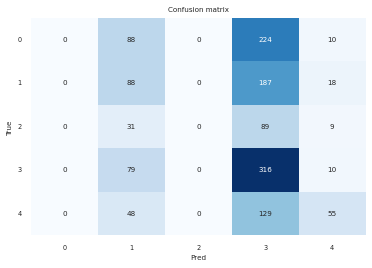

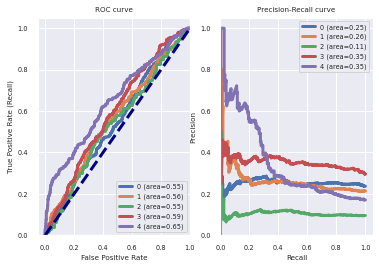

In [28]:
import sklearn.metrics as metrics
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred_raw, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test, y_pred))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2)
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           y_pred_raw[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="ROC curve")
ax[0].legend(loc="lower right")
ax[0].grid(True)
plt.savefig('5 classes Conv-BiLSTM ROC.png', bbox_inches = "tight")
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], y_pred_raw[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.savefig('5 classes Conv-BiLSTM precision-recall curve.png', bbox_inches = "tight")
plt.show()